<a href="https://colab.research.google.com/github/ashiqurrahmankhan21st/BreastCancer/blob/main/Breast_Cancer_V4_Gaussion_Cop_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
#import keras_metrics
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import time

In [2]:
#Gaussion_Cop
df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/GC_SDV_BreastCancer.csv")
del df['Unnamed: 0']
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,12.759,17.02,80.93,509.4,0.06687,0.03913,0.025046,0.016961,0.1493,...,13.858,23.49,88.06,590.4,0.12370,0.13034,0.145731,0.075146,0.2831,0.07432
1,M,11.306,19.79,74.48,390.1,0.10894,0.10373,0.114211,0.053879,0.2135,...,13.389,27.58,90.55,548.5,0.14599,0.26635,0.364920,0.154583,0.4364,0.10487
2,M,12.325,24.63,81.38,484.2,0.11996,0.16272,0.067551,0.047048,0.2181,...,13.615,31.28,92.97,611.2,0.14752,0.37139,0.172141,0.110892,0.3186,0.10515
3,B,10.635,24.89,68.67,341.9,0.08418,0.08830,0.027259,0.006019,0.1938,...,11.340,29.58,75.24,397.9,0.13029,0.15898,0.044588,0.052535,0.2564,0.08163
4,M,28.110,29.74,188.50,2286.8,0.06442,0.06746,0.191878,0.115942,0.1850,...,36.040,36.01,232.15,3615.1,0.11879,0.19572,0.576466,0.216770,0.4201,0.06176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,13.590,25.97,88.89,597.2,0.09826,0.10244,0.048636,0.036183,0.1586,...,14.961,34.97,96.72,719.5,0.14368,0.23676,0.144657,0.096611,0.2627,0.08677
9996,B,13.292,19.63,86.72,554.2,0.09190,0.13122,0.059075,0.031142,0.1773,...,16.561,27.23,109.80,875.1,0.13810,0.30831,0.222822,0.105450,0.3257,0.08708
9997,B,9.346,22.18,60.79,275.9,0.10120,0.09687,0.040308,0.022831,0.1485,...,10.957,34.94,71.87,362.1,0.14212,0.20370,0.096103,0.080021,0.2338,0.10824
9998,B,10.727,19.67,68.48,352.5,0.08418,0.07468,0.078046,0.030488,0.1610,...,11.669,30.02,75.03,408.7,0.13676,0.18993,0.211117,0.100522,0.2035,0.08088


In [3]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()

In [4]:
df['diagnosis'].value_counts()

B    6085
M    3915
Name: diagnosis, dtype: int64

In [5]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)
y_test_indi_ML = y_test.copy()
print("Original data : ",df.shape)
print("tarin         : ",X_train.shape)
print("test          : ",X_test.shape[0])
#print("validation    : ",X_val.shape[0])

Original data :  (10000, 31)
tarin         :  (8000, 30)
test          :  2000


In [6]:
# SVM
st = time.time()
svm = SVC(C=0.1, gamma='auto', kernel = 'rbf',probability=True)
svm.fit(X_train, y_train)
send = time.time() - st
STr = svm.score(X_train, y_train)
STe = svm.score(X_test, y_test)
y_pred_svm = svm.predict(X_test)

In [7]:
#ANN
st = time.time()
tf.random.set_seed(123)
ANNmodel = Sequential()
ANNmodel.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
ANNmodel.add(Dense(10, activation='relu'))
ANNmodel.add(Dense(1, activation='sigmoid'))
ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy']) #tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
ANNmodel.fit(X_train,y_train, batch_size = 128, epochs = 20, validation_split = 0.1)
aend = time.time() - st
ATr = ANNmodel.evaluate(X_train,y_train,verbose=0)[1]
ATe = ANNmodel.evaluate(X_test,y_test,verbose=0)[1]
y_pred_ANN = (ANNmodel.predict(X_test) > 0.5).astype("int32")

Epoch 1/20
57/57 [==============================] - 1s 6ms/step - loss: 0.6173 - accuracy: 0.6774 - val_loss: 0.5241 - val_accuracy: 0.7337
Epoch 2/20
57/57 [==============================] - 0s 2ms/step - loss: 0.5274 - accuracy: 0.7350 - val_loss: 0.4987 - val_accuracy: 0.7575
Epoch 3/20
57/57 [==============================] - 0s 4ms/step - loss: 0.5116 - accuracy: 0.7456 - val_loss: 0.4928 - val_accuracy: 0.7650
Epoch 4/20
57/57 [==============================] - 0s 4ms/step - loss: 0.5053 - accuracy: 0.7475 - val_loss: 0.4895 - val_accuracy: 0.7688
Epoch 5/20
57/57 [==============================] - 0s 3ms/step - loss: 0.5019 - accuracy: 0.7517 - val_loss: 0.4877 - val_accuracy: 0.7725
Epoch 6/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4998 - accuracy: 0.7535 - val_loss: 0.4875 - val_accuracy: 0.7750
Epoch 7/20
57/57 [==============================] - 0s 4ms/step - loss: 0.4979 - accuracy: 0.7557 - val_loss: 0.4878 - val_accuracy: 0.7700
Epoch 8/20
57/57 [==

In [8]:
#XGBoost
st = time.time()
xgb = XGBClassifier(objective='binary:logistic',max_depth= 6,alpha= 50,learning_rate= 0.01,n_estimators=250)
xgb.fit(X_train, y_train)
xend = time.time() - st
y_pred_xgb = xgb.predict(X_test)
XTr = accuracy_score(y_train, xgb.predict(X_train))
XTe = accuracy_score(y_test, xgb.predict(X_test))
XTr,XTe

(0.775375, 0.7555)

In [9]:
#KNN
# Define the range of n_neighbors values to test
n_neighbors_values = [1,3, 5, 7, 9, 11]

best_accuracy = 0.0
best_n_neighbors = None

for n_neighbors in n_neighbors_values:
    print("Number of Neighbors:", n_neighbors)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, knn.predict(X_train))
    test_accuracy = accuracy_score(y_test, knn.predict(X_test))

    print('KNN model train accuracy score: {0:0.4f}'.format(train_accuracy))
    print('KNN model test accuracy score: {0:0.4f}'.format(test_accuracy))
    print()

    # Check if the current test accuracy is better than the previous best
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_n_neighbors = n_neighbors
print("best neighbours: ", best_n_neighbors)

st = time.time()
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
kend = time.time() - st
KTr = accuracy_score(y_train, knn.predict(X_train))
KTe = accuracy_score(y_test, knn.predict(X_test))
y_pred_knn = knn.predict(X_test)
KTr,KTe


Number of Neighbors: 1
KNN model train accuracy score: 1.0000
KNN model test accuracy score: 0.6770

Number of Neighbors: 3
KNN model train accuracy score: 0.8323
KNN model test accuracy score: 0.6955

Number of Neighbors: 5
KNN model train accuracy score: 0.7936
KNN model test accuracy score: 0.7090

Number of Neighbors: 7
KNN model train accuracy score: 0.7846
KNN model test accuracy score: 0.7160

Number of Neighbors: 9
KNN model train accuracy score: 0.7774
KNN model test accuracy score: 0.7275

Number of Neighbors: 11
KNN model train accuracy score: 0.7722
KNN model test accuracy score: 0.7340

best neighbours:  11


(0.77225, 0.734)

In [10]:
#RF
st = time.time()
rf = RandomForestClassifier(n_estimators= 500,max_features = 'sqrt', max_samples = 100, random_state=123)
rf.fit(X_train, y_train)
rend = time.time() - st
RTr = accuracy_score(y_train, rf.predict(X_train))
RTe = accuracy_score(y_test, rf.predict(X_test))
y_pred_rf = rf.predict(X_test)
RTr,RTe

(0.75175, 0.7565)

In [11]:
#LR
st = time.time()
lr = LogisticRegression(C= 0.1 , penalty='l1', solver='liblinear', max_iter = 1000, random_state=123)
lr.fit(X_train, y_train)
lend = time.time() - st
LTr = accuracy_score(y_train, lr.predict(X_train))
LTe = accuracy_score(y_test, lr.predict(X_test))
y_pred_lr = lr.predict(X_test)
LTr,LTe

(0.7615, 0.7565)

In [12]:
def CVal(ML):

  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/GC_SDV_BreastCancer.csv")
  del df['Unnamed: 0']

  s = 0
  e = round(df.shape[0]*.2)

  y_pred = []
  y_original = []

  for i in range(5):

    test_set  = df.iloc[s:e,:]
    train_set = df.drop(test_set.index)

    X_train = StandardScaler().fit_transform(train_set.drop(columns=['diagnosis'])).copy()
    y_train = encoder.fit_transform(train_set['diagnosis']).copy()
    X_test = StandardScaler().fit_transform(test_set.drop(columns=['diagnosis'])).copy()
    y_test = encoder.fit_transform(test_set['diagnosis']).copy()

    #svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')

    ML.fit(X_train, y_train)
    y_pred_ML = ML.predict(X_test)


    y_pred.append(y_pred_ML)
    y_original.append(y_test)

    s = e
    e = e + round(df.shape[0]*.2)
    if e-s < round(df.shape[0]*.2):
      e = df.shape[0]+1

  y_pred_final = []
  y_original_final = []

  try:
    for i in range(5):
      for j in range(round(df.shape[0]*.2)):
        y_pred_final.append(y_pred[i][j])
        y_original_final.append(y_original[i][j])
  except:
    pass
  return y_pred_final

In [13]:
def CValANN():

  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/GC_SDV_BreastCancer.csv")
  del df['Unnamed: 0']

  s = 0
  e = round(df.shape[0]*.2)

  y_pred = []
  y_original = []

  for i in range(5):

    test_set  = df.iloc[s:e,:]
    train_set = df.drop(test_set.index)

    X_train = StandardScaler().fit_transform(train_set.drop(columns=['diagnosis'])).copy()
    y_train = encoder.fit_transform(train_set['diagnosis']).copy()
    X_test = StandardScaler().fit_transform(test_set.drop(columns=['diagnosis'])).copy()
    y_test = encoder.fit_transform(test_set['diagnosis']).copy()

    #svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')
    tf.random.set_seed(123)
    ANNmodel = Sequential()
    ANNmodel.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
    ANNmodel.add(Dense(10, activation='relu'))
    ANNmodel.add(Dense(1, activation='sigmoid'))
    ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy']) #tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
    ANNmodel.fit(X_train,y_train, batch_size = 128, epochs = 20, validation_split = 0.1)
    y_pred_ANN = (ANNmodel.predict(X_test) > 0.5).astype("int32")


    y_pred.append(y_pred_ANN)
    y_original.append(y_test)

    s = e
    e = e + round(df.shape[0]*.2)
    if e-s < round(df.shape[0]*.2):
      e = df.shape[0]

  y_pred_fina = []
  y_original_final = []

  try:
    for i in range(5):
      for j in range(round(df.shape[0]*.2)):
        y_pred_fina.append(y_pred[i][j])
        y_original_final.append(y_original[i][j])
  except:
    pass

  y_pred_final = []

  for i in range(len(y_pred_fina)):
    y_pred_final.append(y_pred_fina[i][0])

  return y_pred_final

In [14]:
newdata = pd.DataFrame({
    "SVM": CVal(SVC(C=0.1, gamma='auto', kernel = 'rbf'))
})
newdata["KNN"] = CVal(KNeighborsClassifier(n_neighbors=3))
newdata["RF"]  = CVal(RandomForestClassifier(n_estimators= 500,max_features = 'sqrt', max_samples = 100, random_state=123))
newdata['LR']  = CVal(LogisticRegression(C= 0.1 , penalty='l1', solver='liblinear', max_iter = 1000, random_state=123))
newdata["ANN"] = CValANN()
newdata["XGB"] = CVal(XGBClassifier(objective='binary:logistic',max_depth= 7,alpha= 10,learning_rate= 1,n_estimators=100))
newdata['y_test'] = encoder.fit_transform(df['diagnosis']).copy()

Epoch 1/20
57/57 [==============================] - 1s 6ms/step - loss: 0.5767 - accuracy: 0.7065 - val_loss: 0.5151 - val_accuracy: 0.7475
Epoch 2/20
57/57 [==============================] - 0s 3ms/step - loss: 0.5119 - accuracy: 0.7485 - val_loss: 0.4953 - val_accuracy: 0.7650
Epoch 3/20
57/57 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.7539 - val_loss: 0.4888 - val_accuracy: 0.7700
Epoch 4/20
57/57 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.7569 - val_loss: 0.4863 - val_accuracy: 0.7600
Epoch 5/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4955 - accuracy: 0.7593 - val_loss: 0.4843 - val_accuracy: 0.7713
Epoch 6/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4941 - accuracy: 0.7590 - val_loss: 0.4857 - val_accuracy: 0.7675
Epoch 7/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.7626 - val_loss: 0.4847 - val_accuracy: 0.7650
Epoch 8/20
57/57 [==

In [15]:
newdata.head()

,SVM,KNN,RF,LR,ANN,XGB,y_test
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,1,1,1,0,1,1,1
3,0,0,0,0,0,1,0
4,1,1,1,1,1,1,1


In [16]:
# Define the DNN model
DNNX = newdata.drop(columns=['y_test']).copy()
DNNY = newdata.y_test.copy()
DX_train, DX_test, Dy_train, Dy_test = train_test_split(
    DNNX, DNNY, test_size=0.2, random_state=123)

st = time.time()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=DNNX.shape[1:]),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(DX_train, Dy_train, epochs=500, batch_size=64, validation_split=0.2)
dend = time.time() - st

Epoch 1/500
100/100 [==============================] - 2s 5ms/step - loss: 0.6586 - accuracy: 0.7298 - val_loss: 0.6342 - val_accuracy: 0.7556
Epoch 2/500
100/100 [==============================] - 0s 3ms/step - loss: 0.6301 - accuracy: 0.7539 - val_loss: 0.6202 - val_accuracy: 0.7631
Epoch 3/500
100/100 [==============================] - 0s 3ms/step - loss: 0.6154 - accuracy: 0.7555 - val_loss: 0.6045 - val_accuracy: 0.7688
Epoch 4/500
100/100 [==============================] - 0s 3ms/step - loss: 0.6045 - accuracy: 0.7566 - val_loss: 0.5918 - val_accuracy: 0.7681
Epoch 5/500
100/100 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.7558 - val_loss: 0.5818 - val_accuracy: 0.7681
Epoch 6/500
100/100 [==============================] - 0s 3ms/step - loss: 0.5869 - accuracy: 0.7542 - val_loss: 0.5743 - val_accuracy: 0.7681
Epoch 7/500
100/100 [==============================] - 0s 3ms/step - loss: 0.5786 - accuracy: 0.7563 - val_loss: 0.5658 - val_accuracy: 0.7694

In [17]:
#y_pred_DNN = (model.predict(DNNX) > 0.5).astype("int32")
DTr = model.evaluate(DX_train, Dy_train,verbose=0)[1]
DTe = model.evaluate(DX_test, Dy_test,verbose=0)[1]
DTr,DTe

(0.7628750205039978, 0.7559999823570251)

In [18]:
y_pred_DNN = (model.predict(DX_test) > 0.5).astype("int32")

63/63 [==============================] - 0s 1ms/step


In [19]:
acc = pd.DataFrame(
    {
    "SVM":[STr,STe],
    "KNN":[KTr,KTe],
    "RF" :[RTr,RTe],
    "LR" :[LTr,LTe],
    "ANN":[ATr,ATe],
    "XGB":[XTr,XTe],
    "DNN":[DTr,DTe]})
acc.index = ["train", "test"]
acc = acc.T
acc

,train,test
SVM,0.755750,0.7555
KNN,0.772250,0.7340
RF,0.751750,0.7565
LR,0.761500,0.7565
ANN,0.764875,0.7505
XGB,0.775375,0.7555
DNN,0.762875,0.7560


### **AutoML Individual and AutoML DNN**

In [20]:
#H2O AutoML

In [21]:
!pip install h2o
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()
from h2o.model.segment_models import H2OFrame
from h2o.automl import H2OAutoML
print("All Library Loaded")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697886 sha256=43482cd91aa527b5dd2bff45ffc4a9f7142284223a2dbe0aa2179451d624e4c4
  Stored in directory: /root/.cache/pip/wheels/43/f2/b0/5bb4d702a0467e82d77c45088db3eef25114c26b0eec8e7f6a
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpnk3shhba
  JVM stdout: /tmp/tmpnk3shhba/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpnk3shhba/h2o_unknownUser_star

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,2 months and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_mavhl8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


All Library Loaded


In [22]:
#train, valid = hdf.split_frame(ratios=[.8], seed=123)
#hdf = h2o.H2OFrame(df)
#hdf["diagnosis"] = hdf["diagnosis"].asfactor()
hy = "diagnosis"
hx = list(df.columns)
hx.remove(hy)
hdf  = df.copy()
hdf.iloc[:,1:] = StandardScaler().fit_transform(hdf.iloc[:,1:])
hdf.iloc[:,0] = LabelEncoder().fit_transform(hdf.iloc[:,0])
hdf.iloc[:,0] = hdf.iloc[:,0].astype('category')
train1, valid1 = train_test_split(hdf, test_size=0.2,random_state=123)
train = h2o.H2OFrame(train1)
valid = h2o.H2OFrame(valid1)
train["diagnosis"] = train["diagnosis"].asfactor()
valid["diagnosis"] = valid["diagnosis"].asfactor()

<ipython-input-22-460708a37676>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  hdf.iloc[:,0] = LabelEncoder().fit_transform(hdf.iloc[:,0])


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [23]:
st = time.time()
aml = H2OAutoML(max_models = 10, seed = 123, verbosity="info",
                nfolds=10, sort_metric='accuracy')
aml.train(x = hx, y = hy, training_frame = train,
          validation_frame = valid)
autoend = time.time() - st

AutoML progress: |
10:47:02.799: Project: AutoML_1_20230704_104702
10:47:02.801: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
10:47:02.807: Setting stopping tolerance adaptively based on the training frame: 0.011180339887498949
10:47:02.807: Build control seed: 123
10:47:02.808: training frame: Frame key: AutoML_1_20230704_104702_training_py_1_sid_9493    cols: 31    rows: 8000  chunks: 2    size: 1926169  checksum: -5743320669190601360
10:47:02.820: validation frame: Frame key: py_2_sid_9493    cols: 31    rows: 2000  chunks: 1    size: 482912  checksum: 7051888715556309816
10:47:02.820: leaderboard frame: NULL
10:47:02.820: blending frame: NULL
10:47:02.820: response column: diagnosis
10:47:02.820: fold column: null
10:47:02.820: weights column: null
10:47:02.869: Loading ex

In [24]:
lb = aml.leaderboard
lb.head()

model_id,accuracy,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_1_20230704_104702,0.731375,0.789913,0.561354,0.704715,0.281571,0.431458,0.186156
XGBoost_2_AutoML_1_20230704_104702,0.732875,0.786979,0.569302,0.710217,0.292189,0.432906,0.187407
GBM_4_AutoML_1_20230704_104702,0.74325,0.804633,0.521738,0.73211,0.271387,0.416969,0.173863
XGBoost_3_AutoML_1_20230704_104702,0.746125,0.807007,0.522189,0.733116,0.269031,0.41621,0.173231
DRF_1_AutoML_1_20230704_104702,0.747375,0.804947,0.538154,0.731415,0.271721,0.415924,0.172993
XRT_1_AutoML_1_20230704_104702,0.747875,0.806856,0.550448,0.732292,0.261301,0.415221,0.172409
GBM_3_AutoML_1_20230704_104702,0.750125,0.812317,0.513038,0.737965,0.266742,0.412843,0.170439
GBM_2_AutoML_1_20230704_104702,0.7515,0.813887,0.51051,0.741607,0.261279,0.411848,0.169619
GBM_1_AutoML_1_20230704_104702,0.752625,0.816537,0.506866,0.747142,0.259403,0.409777,0.167917
StackedEnsemble_BestOfFamily_1_AutoML_1_20230704_104702,0.760375,0.830465,0.490144,0.765236,0.250482,0.402491,0.161999


In [25]:
best_model = aml.get_best_model()
best_model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20230704_104702


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.0862762318888866
RMSE: 0.2937281598500331
LogLoss: 0.2961195502729631
Mean Per-Class Error: 0.10560430092631945
AUC: 0.9574856020131994
AUCPR: 0.9379440756884645
Gini: 0.9149712040263989

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40771300310180303
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      4317  551   0.1132   (551.0/4868.0)
1      307   2825  0.098    (307.0/3132.0)
Total  4624  3376  0.1072   (858.0/8000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.407713     0.868162  213
max f2                       0.291031     0.900738  254
max f0point5                 0.608403     0.885993  148
max accuracy                 0.44304      0.894625  201
max precision                0.993199     1         0
max recall                   0.0188069    1         390
max specificity              0.993199     1         0
max absolute_mcc             0.426081     0.780124  207
max min_per_class_accuracy   0.419471     0.89272   209
max mean_per_class_accuracy  0.383103     0.894835  222
max tns                      0.993199     4868      0
max fns                      0.993199     3120      0
max fps                      0.0052119    4868      399
max tps                      0.0188069    3132      390
max tnr                      0.993199     1         0
max fnr                      0.993199     0.996169  0
max fpr                      0.0052119    1         399
max tpr                      0.0188069    1         390

Gains/Lift Table: Avg response rate: 39.15 %, avg score: 39.32 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        0.983273           2.55428    2.55428            1                0.988143   1                           0.988143            0.0255428       0.0255428                  155.428   155.428            0.0255428
2        0.02                        0.974009           2.55428    2.55428            1                0.978908   1                           0.983526            0.0255428       0.0510856                  155.428   155.428            0.0510856
3        0.03                        0.965              2.52235    2.54364            0.9875           0.969758   0.995833                    0.978936            0.0252235       0.0763091                  152.235   154.364            0.0761036
4        0.04                        0.956618           2.55428    2.5463             1                0.960834   0.996875                    0.974411            0.0255428       0.101852                   155.428   154.63             0.101646
5        0.05                        0.948257           2.49042    2.53512            0.975            0.952464   0.9925                      0.970021            0.0249042       0.126756                   149.042   153.512            0.12614
6        0.1                         0.891808           2.52235    2.52874            0.9875           0.92015    0.99                        0.945086            0.126117        0.252874                   152.235   152.874            0.25123
7        0.15                        0.834331           2.49042    2.51596            

In [26]:
best_model.model_performance(train).accuracy()

[[0.44304026911656064, 0.894625]]

In [27]:
best_model = aml.get_best_model()
HATr  = best_model.model_performance(train)
HATe  = best_model.model_performance(valid)

In [28]:
y_pred_h2o = pd.DataFrame(h2o.as_list(best_model.predict(valid)))['predict']
y_test_h2o = np.array(valid1['diagnosis']).copy()

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [29]:
#SFOLD DATA AUTOML
#strain, svalid = shdf.split_frame(ratios=[.8], seed=123)
shdf  = newdata.copy()
#shdf['y_test'] = shdf['y_test'].replace(0,"B")
#shdf['y_test'] = shdf['y_test'].replace(1,"M")
shy = "y_test"
shx = list(shdf.columns)
shx.remove(shy)

shdf.iloc[:,0:6] = StandardScaler().fit_transform(shdf.iloc[:,0:6])
#shdf.iloc[:,-1] = LabelEncoder().fit_transform(shdf.iloc[:,-1])
strain1, svalid1 = train_test_split(shdf, test_size=0.2,random_state=123)
strain = h2o.H2OFrame(strain1)
svalid = h2o.H2OFrame(svalid1)
strain["y_test"] = strain["y_test"].asfactor()
svalid["y_test"] = svalid["y_test"].asfactor()

st = time.time()
saml = H2OAutoML(max_models = 10, seed = 123, verbosity="info", nfolds=10, sort_metric='accuracy')
saml.train(x = shx, y = shy, training_frame = strain, validation_frame = svalid)
sautoend = time.time() - st
sbest_model = saml.get_best_model()
sHATr  = sbest_model.model_performance(strain)
sHATe  = sbest_model.model_performance(svalid)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
10:51:58.461: Project: AutoML_2_20230704_105158
10:51:58.461: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
10:51:58.462: Setting stopping tolerance adaptively based on the training frame: 0.011180339887498949
10:51:58.462: Build control seed: 123
10:51:58.462: training frame: Frame key: AutoML_2_20230704_105158_training_py_11_sid_9493    cols: 7    rows: 8000  chunks: 1    size: 98174  checksum: 691450733884769904
10:51:58.463: validation frame: Frame key: py_12_sid_9493    cols: 7    rows: 2000  chunks: 1    size: 25424  checksum: 6791181805634214736
10:51:58.463: leader

In [30]:
y_pred_sh2o = pd.DataFrame(h2o.as_list(sbest_model.predict(svalid)))['predict']
y_test_sh2o = np.array(svalid1['y_test']).copy()

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


<BarContainer object of 7 artists>

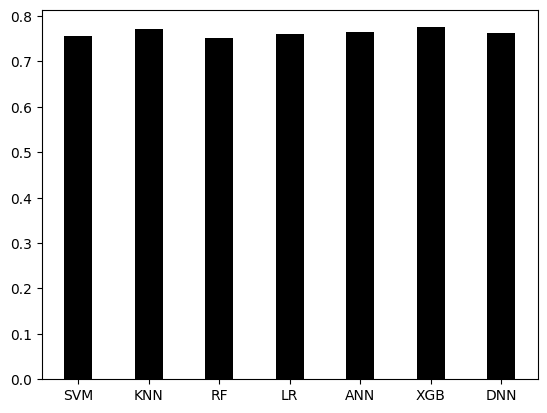

In [31]:
import matplotlib.pyplot as plt
plt.bar(acc.index, acc['train'], color ='black',width = 0.4)

In [32]:
m = [ANNmodel, model, knn, lr, rf, svm, xgb, best_model]

label = ["ArtificialNeuralNetwork", 'DeepNeuralNetwork',
         'KNearestNeighborsClassifier', 'LogisticRegression',
         'RandomForestClassifier', 'SupportVectorClassifier',
         'XGBoost', type(best_model).__name__, type(sbest_model).__name__ ]

acc = pd.DataFrame(
    {
    "ANN":[ATr,ATe],
    "DNN":[DTr,DTe],
    "KNN":[KTr,KTe],
    "LR" :[LTr,LTe],
    "RF" :[RTr,RTe],
    "SVM":[STr,STe],
    "XGB":[XTr,XTe],
    "H_OD":[HATr.accuracy()[0][1],HATe.accuracy()[0][1]],
    "H_SOD":[sHATr.accuracy()[0][1],sHATe.accuracy()[0][1]]
    })
acc.index = ["train", "test"]
acc = acc.T
acc['Model'] = label

acc = acc[['Model', 'train', 'test']]
acc['avg'] = round((acc['train'] + acc['test'])/2, 6)
acc[acc["avg"] == acc["avg"].max()]
acc['BestModel'] = 0
for i in range(len(acc)):
  if acc['avg'][i] >= 90 and acc['avg'][i] < acc['avg'].max():
    acc.iloc[i,-1] = "good"
  elif acc['avg'][i] == acc['avg'].max():
    acc.iloc[i,-1] = "best"
  else:
    acc.iloc[i,-1] = "not good"

acc["Precision"] = np.zeros(len(acc))
acc["Recall"]    = np.zeros(len(acc))
acc["F1_Score"]  = np.zeros(len(acc))



In [33]:
y_pred_ANNn = []
y_pred_DNNn = []
for i in range(len(y_pred_ANN)):
  y_pred_ANNn.append(y_pred_ANN[i][0])
  y_pred_DNNn.append(y_pred_DNN[i][0])

In [34]:
pred = [np.array(y_pred_ANNn), np.array(y_pred_DNNn), y_pred_knn,
        y_pred_lr, y_pred_rf,
        y_pred_svm, y_pred_xgb, y_pred_h2o, y_pred_sh2o]

tes  = [y_test_indi_ML, np.array(Dy_test), y_test_indi_ML, y_test_indi_ML,
        y_test_indi_ML, y_test_indi_ML, y_test_indi_ML,
        y_test_h2o.copy(), y_test_sh2o.copy()]

In [35]:
for i in range(len(pred)):
  p,r,f,_ = precision_recall_fscore_support(tes[i], pred[i],
                                            average='macro')
  acc.iloc[i,5]= p
  acc.iloc[i,6]= r
  acc.iloc[i,7]= f
  p = 0
  r = 0
  f = 0
acc

,Model,train,test,avg,BestModel,Precision,Recall,F1_Score
ANN,ArtificialNeuralNetwork,0.764875,0.7505,0.757688,not good,0.743555,0.720978,0.727157
DNN,DeepNeuralNetwork,0.762875,0.7560,0.759438,not good,0.747419,0.730507,0.735880
KNN,KNearestNeighborsClassifier,0.772250,0.7340,0.753125,not good,0.723671,0.705142,0.710304
LR,LogisticRegression,0.761500,0.7565,0.759000,not good,0.752195,0.725225,0.732152
RF,RandomForestClassifier,0.751750,0.7565,0.754125,not good,0.748737,0.729779,0.735544
SVM,SupportVectorClassifier,0.755750,0.7555,0.755625,not good,0.752952,0.722126,0.729413
XGB,XGBoost,0.775375,0.7555,0.765438,not good,0.747051,0.729641,0.735101
H_OD,H2OXGBoostEstimator,0.894625,0.7385,0.816563,best,0.691755,0.698796,0.676574
H_SOD,H2OGeneralizedLinearEstimator,0.757625,0.7605,0.759062,not good,0.729287,0.739078,0.730558


<BarContainer object of 9 artists>

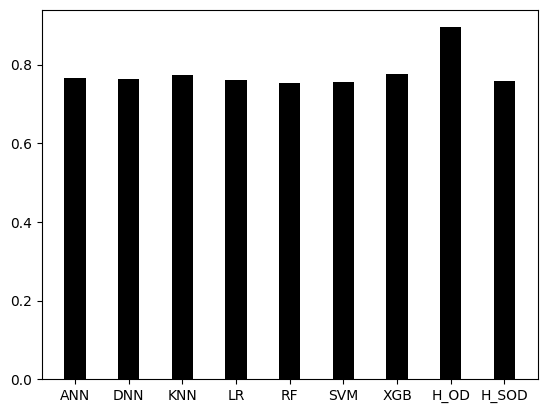

In [36]:
import matplotlib.pyplot as plt
plt.bar(acc.index, acc['train'], color ='black',width = 0.4)

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve

In [38]:
m = [ANNmodel, model, knn, lr, rf, svm, xgb, best_model]

In [39]:
#encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)
y_test_indi_ML = y_test.copy()

In [40]:
from sklearn import metrics

63/63 [==============================] - 0s 1ms/step
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


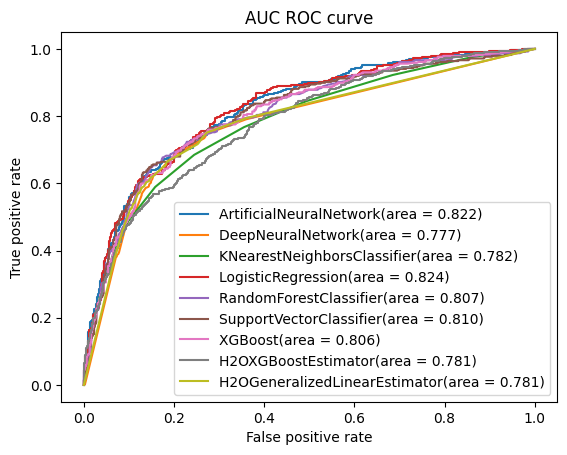

In [41]:
plt.figure(1)
plt.rcParams["figure.figsize"] = [10, 5]

y_pred = ANNmodel.predict(X_test).ravel()
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[0]) + '(area = {:.3f})'.format(auc))

y_pred = model.predict(DX_test).ravel()
y_test = Dy_test.copy()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[1]) + '(area = {:.3f})'.format(auc))

y_pred = knn.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[2]) + '(area = {:.3f})'.format(auc))

y_pred = lr.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[3]) + '(area = {:.3f})'.format(auc))

y_pred = rf.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[4]) + '(area = {:.3f})'.format(auc))

y_pred = svm.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[5]) + '(area = {:.3f})'.format(auc))

y_pred = xgb.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[6]) + '(area = {:.3f})'.format(auc))

y_pred = pd.DataFrame(h2o.as_list(best_model.predict(valid)))
y_test = h2o.as_list(valid['diagnosis'])
fpr, tpr, thresholds = roc_curve(y_test, y_pred["p1"])
auc = metrics.roc_auc_score(y_test, y_pred["p1"])
plt.plot(fpr, tpr,label=type(best_model).__name__ + '(area = {:.3f})'.format(auc))

y_pred = pd.DataFrame(h2o.as_list(sbest_model.predict(svalid)))
y_test = h2o.as_list(svalid['y_test'])
fpr, tpr, thresholds = roc_curve(y_test, y_pred["p1"])
auc = metrics.roc_auc_score(y_test, y_pred["p1"])
plt.plot(fpr, tpr,label=type(sbest_model).__name__ + '(area = {:.3f})'.format(auc))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC ROC curve')
plt.legend(loc='best')
plt.show()

In [42]:
tm = [aend,dend,kend,lend,rend,send,xend,autoend,sautoend]

In [43]:
acc['time'] = 0

In [44]:
acc['time'] = tm

In [45]:
acc

,Model,train,test,avg,BestModel,Precision,Recall,F1_Score,time
ANN,ArtificialNeuralNetwork,0.764875,0.7505,0.757688,not good,0.743555,0.720978,0.727157,5.387012
DNN,DeepNeuralNetwork,0.762875,0.7560,0.759438,not good,0.747419,0.730507,0.735880,203.481221
KNN,KNearestNeighborsClassifier,0.772250,0.7340,0.753125,not good,0.723671,0.705142,0.710304,0.002926
LR,LogisticRegression,0.761500,0.7565,0.759000,not good,0.752195,0.725225,0.732152,0.187616
RF,RandomForestClassifier,0.751750,0.7565,0.754125,not good,0.748737,0.729779,0.735544,1.855545
SVM,SupportVectorClassifier,0.755750,0.7555,0.755625,not good,0.752952,0.722126,0.729413,19.026791
XGB,XGBoost,0.775375,0.7555,0.765438,not good,0.747051,0.729641,0.735101,12.631472
H_OD,H2OXGBoostEstimator,0.894625,0.7385,0.816563,best,0.691755,0.698796,0.676574,291.899301
H_SOD,H2OGeneralizedLinearEstimator,0.757625,0.7605,0.759062,not good,0.729287,0.739078,0.730558,77.810254
